In [1]:
%matplotlib inline
# Needed to allow editing using PyCharm
%load_ext autoreload
%autoreload 2

In [2]:
import os
if os.getcwd() == '/content':
    from google.colab import drive
    drive.mount('/content/gdrive')
    BASE_PATH = '/content/gdrive/My Drive/Level-4-Project/'
    !cd gdrive/My\ Drive/Level-4-Project/ && pip install --editable .
    os.chdir('gdrive/My Drive/Level-4-Project/')
    
elif os.getcwd() == 'C:\\Users\\macka\\Google Drive\\Level-4-Project\\notebooks':
    BASE_PATH = "C:/Users/macka/Google Drive/Level-4-Project/"
    
else:
    BASE_PATH = "/export/home/2192793m/Level-4-Project/"
    
DATA_PATH = BASE_PATH + 'data/'
RAW_PATH = DATA_PATH + 'raw/'
INTERIM_PATH = DATA_PATH + 'interim/'

In [3]:
from src.features import make_spectrograms, process_labels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy.signal import butter, freqz, lfilter, spectrogram

In [27]:
df_labels = pd.read_csv(RAW_PATH + 'Labels.csv')
df_labels.rename(columns={'dataset ID':'dataset_id'}, inplace=True)
print(df_labels)

     dataset_id              angle      person  \
0             1              0 deg  Aleksandar   
1             2              0 deg  Aleksandar   
2             3             30 deg  Aleksandar   
3             4             30 deg  Aleksandar   
4             5            60 deg   Aleksandar   
5             6            60 deg   Aleksandar   
6             7              0 deg  Aleksandar   
7             8              0 deg  Aleksandar   
8             9             30 deg  Aleksandar   
9            10             30 deg  Aleksandar   
10           11            60 deg   Aleksandar   
11           12            60 deg   Aleksandar   
12           13              0 deg  Aleksandar   
13           14              0 deg  Aleksandar   
14           15              0 deg  Aleksandar   
15           16              0 deg  Aleksandar   
16           17              0 deg  Aleksandar   
17           18              0 deg  Aleksandar   
18           19              0 deg  Aleksandar   


In [28]:
df_labels = process_labels.process_labels(df_labels)

Pandas(Index=0, dataset_id=1, angle='0 deg', person='Aleksandar', movement='Walking', label='walking', user_label='A', aspect_angle='0', on_place=False)


KeyboardInterrupt: 

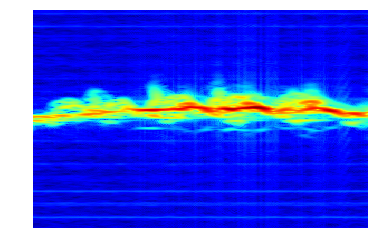

In [32]:
for row in df_labels.itertuples():
    print(row)
    file_name = RAW_PATH + "Dataset_" + str(row.dataset_id) + ".dat"
    radar_df = pd.read_table(file_name, sep="\n", header=None)
    directory = INTERIM_PATH + row.user_label
    if not os.path.exists(directory):
        os.makedirs(directory)
    sub_directory = directory + "/" + row.label
    if not os.path.exists(sub_directory):
        os.makedirs(sub_directory)
    spectrograms = make_spectrograms.make_spectrograms(radar_df)
    count = 1
    for spectrogram in spectrograms:
        plt.imshow(20 * np.log10(abs(spectrogram)), cmap='jet', aspect="auto")
        plt.axis('off')
        plt.savefig(sub_directory + "/" + str(count)+".png")
        count += 1
    break
    